In [1]:
from Evaluator import Evaluator
from PredictorSlide import Predictor
import numpy as np
import os

In [2]:
db_path = "/scratch/users/mdelabrassinne/Database/SoccerDB.db"
model = None
step = 1
size = 8
thresholds = np.array([0.2, 0, 0, 0.98, 0.8])
min_count = 6
fps = 2
type_pred = "Validation"
actions_name = ['Corner', 'Goal', 'Penalty', 'Kick-off', 'card', 'NoClass']

predictor = Predictor(size, step, model, db_path, thresholds=thresholds, min_count = min_count, fps=fps, actions = actions_name)
preds = predictor.load_predictions()
real_preds = []
for pred in preds:
    if pred:
        real_preds.append(pred)
preds = real_preds
evals = []
for pred in preds:
    timeline = predictor.predict_match(pred)
    evals.append({"Match": pred["Match"], "Timeline": timeline})

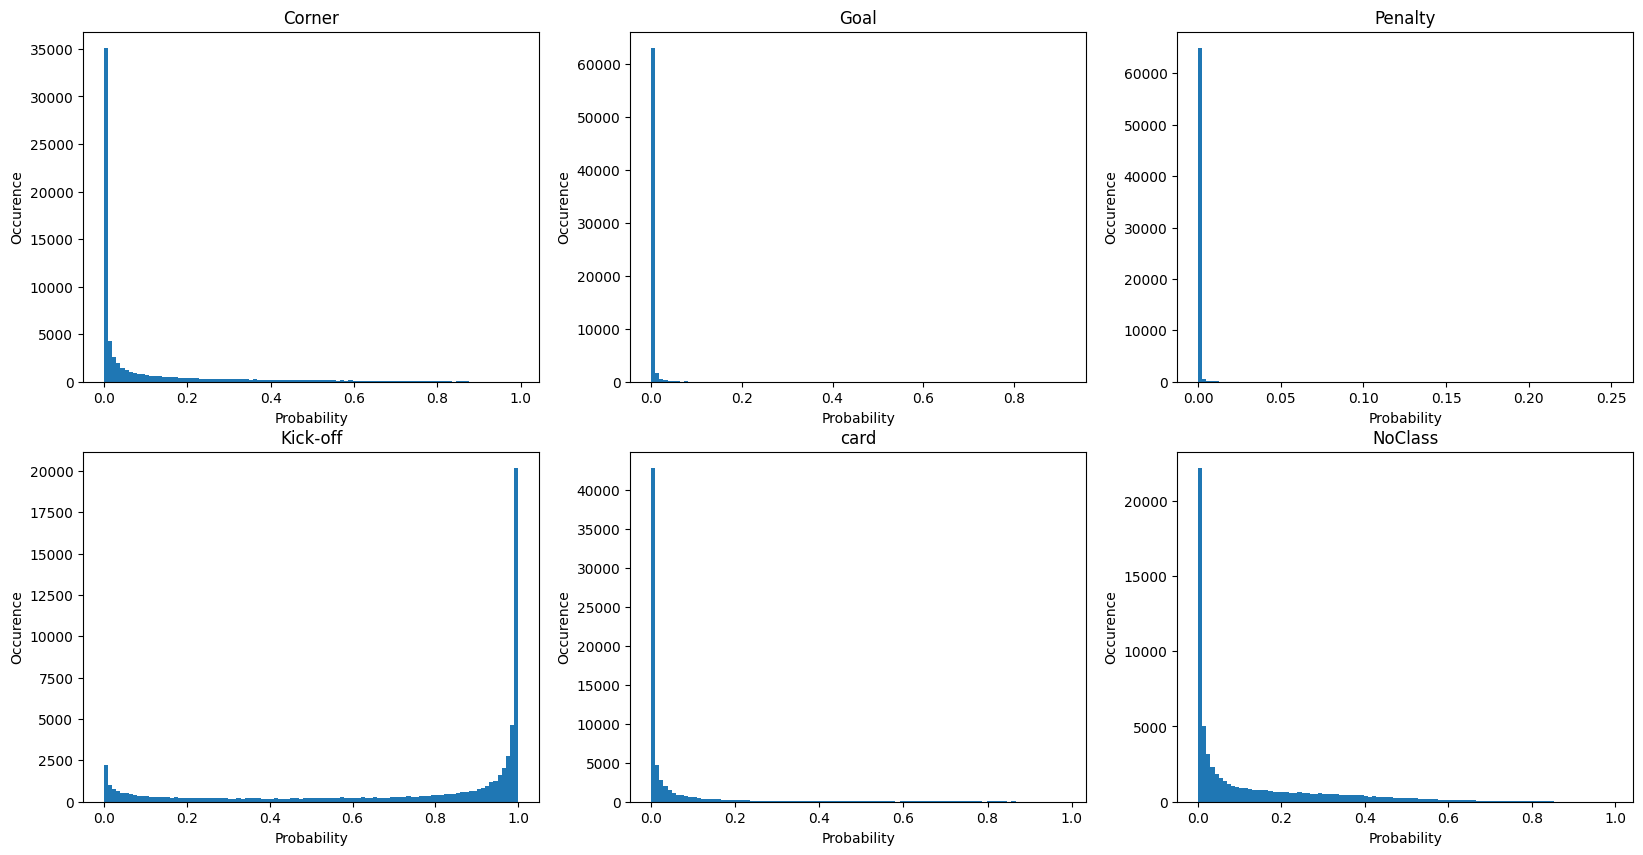

In [3]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(2, 3, figsize=(20, 10))

data = np.array(preds[0]["Prediction"])
time_data = np.array(preds[0]["Time"])

for i, pred in enumerate(preds):
    if i != 0:
        predictions = pred["Prediction"]
        time = pred["Time"]
        # add predictions to data
        data = np.concatenate((data, predictions), axis=0)
        time_data = np.concatenate((time_data, time), axis=0)

for i, eval in enumerate(actions_name):
    if i < 3:
        ax[0, i].hist(data[:, i], bins=100)
        ax[0, i].set_title(eval)
        ax[0, i].set_xlabel("Probability")
        ax[0, i].set_ylabel("Occurence")
    else:
        ax[1, i-3].hist(data[:, i], bins=100)
        ax[1, i-3].set_title(eval)
        ax[1, i-3].set_xlabel("Probability")
        ax[1, i-3].set_ylabel("Occurence")

In [4]:
pred_files = []
sol_files = []
for eval in evals:
    eval["json_pred"] = Evaluator.create_json(eval["Match"], eval["Timeline"], type_pred)
    eval["json_sol"] = Evaluator.get_json_sol(eval["Match"])
    # if sol does not exist, remove eval from evals
    if os.path.exists(eval["json_sol"]):
        # remove eval from evals
        pred_files.append(eval["json_pred"])
        sol_files.append(eval["json_sol"])
    else:
        print("No solution for match: " + eval["Match"])

No solution for match: /scratch/users/mdelabrassinne/Database/france_ligue-1/2016-2017/2017-02-08_-_18-00_Nice_1_-_0_Saint_Etienne/2_224p.mkv


In [5]:
res = Evaluator.get_mAP(pred_files, sol_files)

100%|██████████| 12/12 [00:08<00:00,  1.34it/s]


In [6]:
res

{'mAP_classes': {'Penalty': 0.0,
  'Kick-off': 0.00024371919151197527,
  'Goal': 0.0011731032929565338,
  'Corner': 0.002845016196491662,
  'Yellow card': 0.0012346301148961902},
 'mAP': 0.0010992937591712722}